In [3]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('Human_Resources.csv')

<IPython.core.display.Javascript object>

In [2]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [28]:
df.shape

(1470, 35)

### Encode categorical variables

In [29]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [30]:
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})

In [31]:
df['Over18'] = df['Over18'].apply(lambda x:1 if x =='Y' else 0)
print(df['Over18'].value_counts())

1    1470
Name: Over18, dtype: int64


####  It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
####  Let's drop 'EmployeeNumber' as well

In [32]:
df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis=1, inplace=True)

<IPython.core.display.Javascript object>

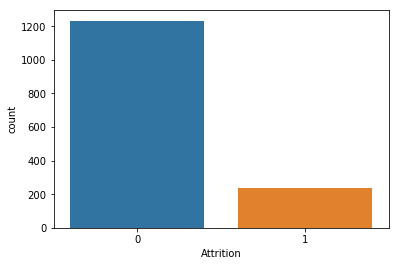

In [33]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 
sns.countplot(x='Attrition', data = df)

Note, as the graph shows, the dataset is unbalanced. When training models on such datasets, class unbalance influences a learning algorithm during training by making decision rule biased towards the majority class and optimizes the predictions based on the majority class in the dataset. There are are a number of ways to deal with this issue - check out model section

**Categorical variables**

In [34]:
vars_cat = [var for var in df.columns if df[var].dtypes == 'O']
vars_cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [35]:
for var in vars_cat:
    print(var)
    print(df[var].nunique())
    print(df[var].unique())
    print()

BusinessTravel
3
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department
3
['Sales' 'Research & Development' 'Human Resources']

EducationField
6
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender
2
['Female' 'Male']

JobRole
9
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus
3
['Single' 'Married' 'Divorced']



In [36]:
# Encode Categorical features
for var in vars_cat:
    df =  pd.concat([df, pd.get_dummies(df[var], prefix=var, drop_first=True)], axis=1)
df.drop(labels=vars_cat, axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,40,3,1,2,...,0,1,0,0,0,0,0,0,1,0


#### Lets remove the following:

- Monthly Rate & Daily Rate - not a significant predictor and hard to interpret

- Job Level - highly correlated with Monthly Income

In [37]:
df.drop(['MonthlyRate', 'JobLevel', 'DailyRate'], axis=1, inplace=True)

In [38]:
y = df['Attrition']

In [39]:
X = df.drop('Attrition', axis=1)

### Scale the data

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
X = scaler.fit_transform(X)

### Split the data

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### TRAIN AND EVALUATE THE FOLLOWING MODELS:

- Logistic Regression
- Random Forest
- Deep Learning (with tensorflow)
- XGB Classifier

### TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
md_LR = LogisticRegression()
md_LR.fit(X_train, y_train)

LogisticRegression()

In [48]:
# Predicting the Test Data and Evaluation
y_pred = md_LR.predict(X_test)

In [50]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 89.67391304347827 %


In [51]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[312,   8],
       [ 30,  18]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(5, 0)

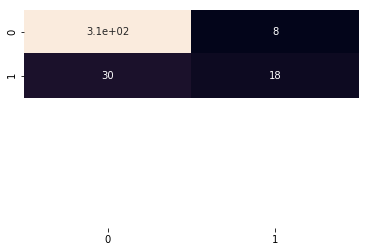

In [52]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True, cbar=False)
plt.ylim(5,0)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       320
           1       0.69      0.38      0.49        48

    accuracy                           0.90       368
   macro avg       0.80      0.68      0.71       368
weighted avg       0.88      0.90      0.88       368



In [55]:
print(md_LR.coef_[0])

[-0.99622465  0.90555598  0.21655525 -0.9524457   0.03257181 -1.27142455
 -0.9847983  -0.35731469  1.38579564  1.86217874 -0.01659159 -0.15735813
 -0.43526164 -0.56695184 -1.1954722  -0.66592863 -0.67872988  0.81850961
 -1.60336103  1.53114875 -1.03709107  1.3798369   0.72477849 -0.57276673
  0.30461499 -0.45352206 -0.06536155 -0.41191865 -0.49646605  0.39782519
  0.41138704  0.63987565  1.40872279 -0.06742987  0.12699615 -0.53154507
  0.4567336  -0.0436646   0.88138129  0.19481618  1.08741525]


In [56]:
# generate oindex for graphs
df_index = df.drop('Attrition', axis=1)

<IPython.core.display.Javascript object>

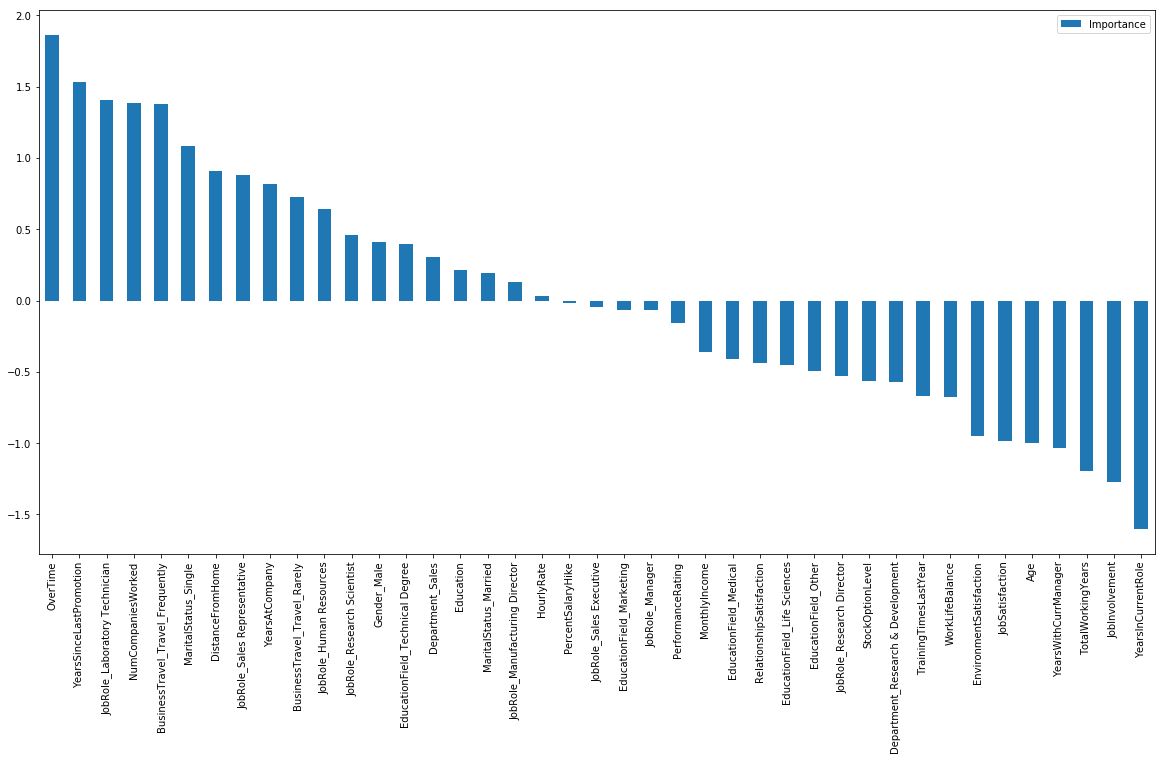

In [57]:
importance = pd.DataFrame(data= md_LR.coef_[0], index=df_index.columns, columns=['Importance'])
importance.sort_values('Importance',ascending=False).plot.bar(figsize=(20,10))

In [58]:
# List Absolute values 
abs(importance).sort_values('Importance',ascending=False)

,Importance
OverTime,1.862179
YearsInCurrentRole,1.603361
YearsSinceLastPromotion,1.531149
JobRole_Laboratory Technician,1.408723
NumCompaniesWorked,1.385796
BusinessTravel_Travel_Frequently,1.379837
JobInvolvement,1.271425
TotalWorkingYears,1.195472
MaritalStatus_Single,1.087415
YearsWithCurrManager,1.037091


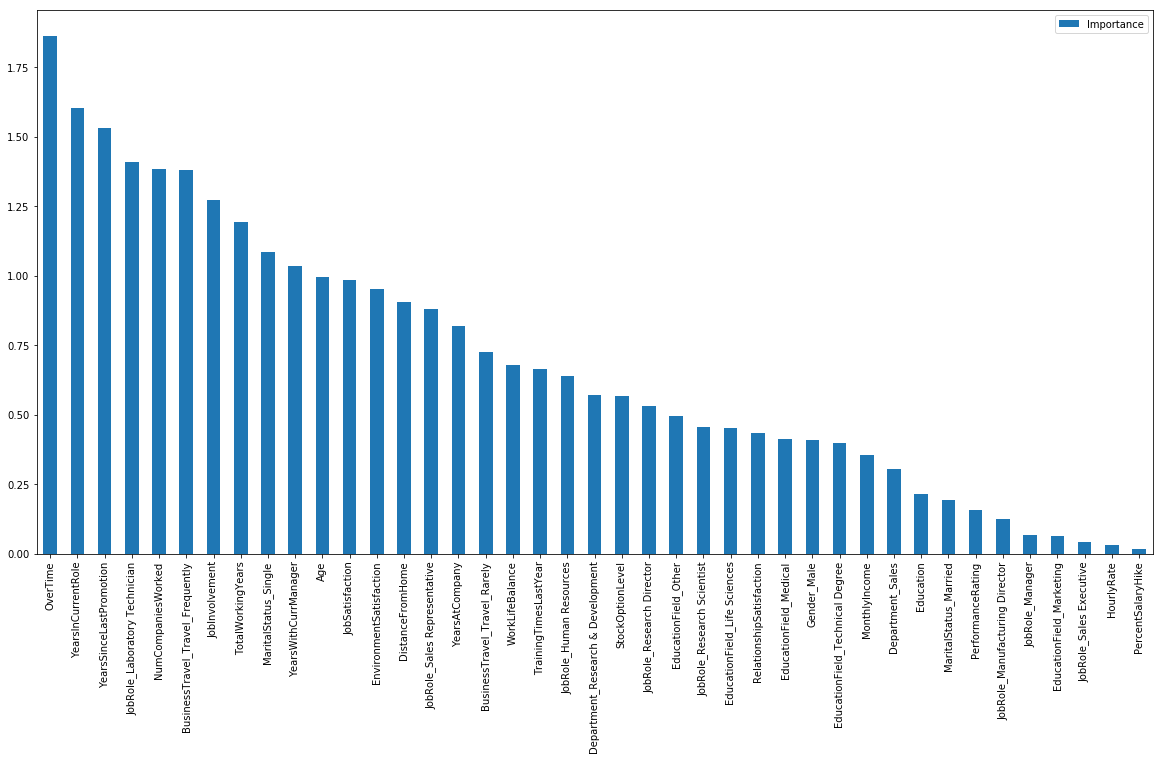

In [59]:
# Graph absolute values
abs(importance).sort_values('Importance',ascending=False).plot.bar(figsize=(20,10))

#### Applying SMOTE

Accuracy is not a useful metric for imbalanced datasets because the model can simply learn to predict the majority class most of the time. The models are biased towards 0 and are not predicting any 1. This is because the model is giving prominence to only 0. This is a common problem in imbalanced datasets.

Although the accuracy is relatively high considering (0.90), if we look at the classification report we can see the accuracy for employees leaving (1) is very low particularly for recall and f1-score.

 precision  /  recall / f1-score /  support

           0       0.91      0.97      0.94       320
           1       0.69      0.38      0.49        48

We have an unbalanced dataset so we can increase the number of samples for empolyees who left the Co.

This can be solved by under sampling or over sampling. In undersampling we may lose important data that may be required for creating rules. Hence we will do over sampling. For all the models we will use a technique called SMOTE (Synthetic Minority oversampling technique) which will create duplicate points for target 1 which will be close to the existing ones and solve the imbalance.

(SMOTE: Synthetic Minority Over-sampling Technique. This method creates synthetic samples of your data, so rather than taking copies of observations, SMOTE uses a distance measure to create synthetic samples of data points that would not be far from your data points)

You can read more at https://towardsdatascience.com/dealing-with-imbalanced-data-in-churn-analysis-6ea1afba8b5e

In [69]:
import sklearn

In [70]:
# We have an unbalanced dataset so we can increase the number of samples for empolyees who left the Co.
# pip install -U imbalanced-learn # PyPI
# conda install -c conda-forge imbalanced-learn # Anaconda
from imblearn.over_sampling import SMOTE

# import imblearn.over_sampling

In [71]:
sm = SMOTE(random_state=0)
X_os,y_os=sm.fit_resample(X,y)

In [72]:
Xos_train, Xos_test, yos_train, yos_test = train_test_split(X_os, y_os, test_size=0.25, random_state=42)

In [73]:
md_LR_os = LogisticRegression()
md_LR_os.fit(Xos_train, yos_train)

LogisticRegression()

In [74]:
# Predicting the Test Data and Evaluation
y_pred_os = md_LR_os.predict(Xos_test)

In [75]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred_os, yos_test)))

Accuracy 78.93030794165315 %


In [76]:
confusion_matrix(y_true=yos_test, y_pred=y_pred_os)

array([[235,  76],
       [ 54, 252]], dtype=int64)

In [77]:
print(classification_report(yos_test,y_pred_os))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       311
           1       0.77      0.82      0.79       306

    accuracy                           0.79       617
   macro avg       0.79      0.79      0.79       617
weighted avg       0.79      0.79      0.79       617



**Although the overall F1 score has decreased we can see that the precision, recall and F1-score has improved significantly for the employees that have lef**

**Feature Importance**

In [78]:
md_LR_os.coef_[0]

array([-1.16816575,  1.0152054 ,  0.30925175, -1.30290644, -0.04216607,
       -1.49246069, -1.13049698,  0.077309  ,  1.48419672,  1.79646881,
       -0.9496956 ,  0.10343805, -0.60504097, -0.43782374, -1.70527789,
       -1.21243429, -1.01809961,  1.29962826, -1.56252024,  2.15147706,
       -1.50584529,  1.5276358 ,  1.00389164, -0.04347123,  0.56784817,
       -0.51738836, -0.22689531, -0.48039833, -0.90024423,  0.44203285,
        0.46107637,  0.45220731,  1.31367241, -0.67764939,  0.04061467,
       -1.42331691,  0.27653494,  0.03603812,  1.00262955,  0.77019564,
        1.5705912 ])

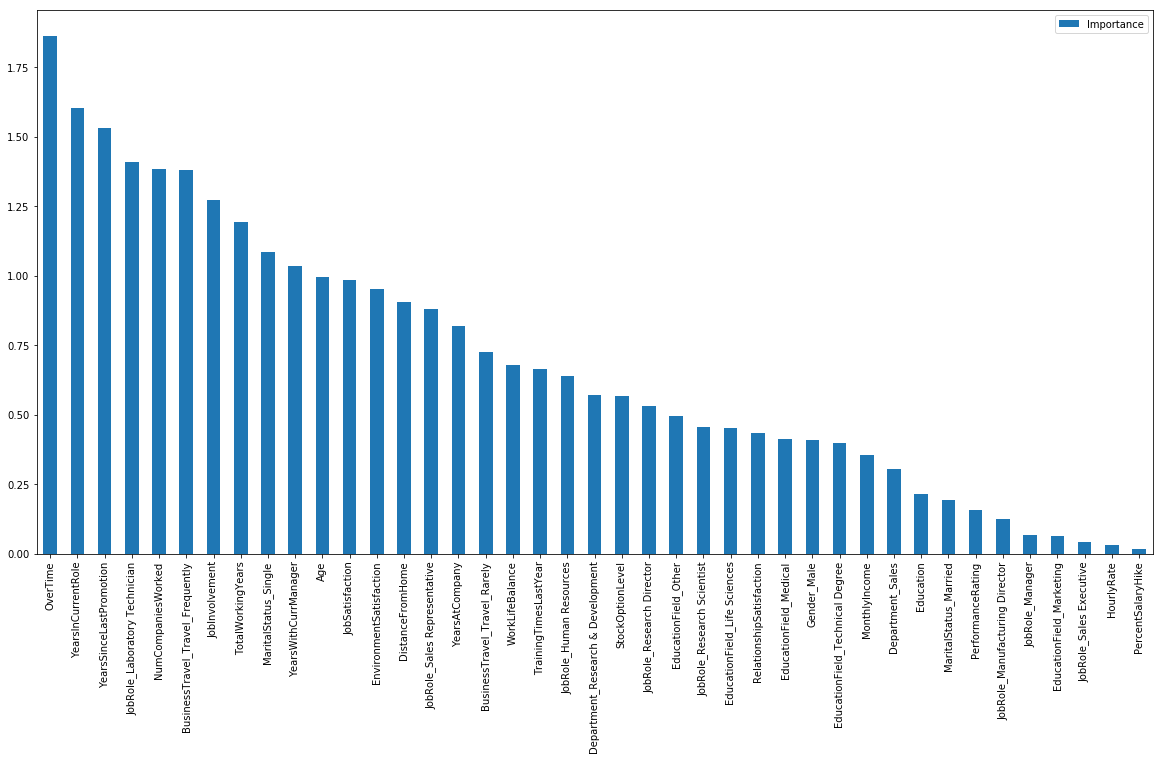

In [79]:
abs(importance).sort_values('Importance',ascending=False).plot.bar(figsize=(20,10))

### Note, the difference in Feature importance after applying SMOTE to the data. This indicates that the unbalance in the data will have a significant impact on the model predictions

### TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [91]:
rfc_pred = rfc.predict(X_test)

In [92]:
print(confusion_matrix(y_true=y_test, y_pred=rfc_pred))

[[316   4]
 [ 44   4]]


In [93]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.50      0.08      0.14        48

    accuracy                           0.87       368
   macro avg       0.69      0.54      0.54       368
weighted avg       0.83      0.87      0.83       368



In [94]:
rfc.feature_importances_

array([0.07189211, 0.04805348, 0.02342335, 0.0308569 , 0.04982456,
       0.02338615, 0.02915198, 0.09352376, 0.04081393, 0.05747028,
       0.03717334, 0.00539166, 0.02640096, 0.03420443, 0.06004259,
       0.03098246, 0.02154277, 0.04750117, 0.03349293, 0.02995298,
       0.03730718, 0.01252952, 0.00826727, 0.00928043, 0.00852094,
       0.00940551, 0.00805439, 0.01029563, 0.00427381, 0.0078411 ,
       0.01152898, 0.00354735, 0.0108237 , 0.0017477 , 0.00340285,
       0.0013493 , 0.00715249, 0.00798188, 0.01057044, 0.00924518,
       0.02179256])

<IPython.core.display.Javascript object>

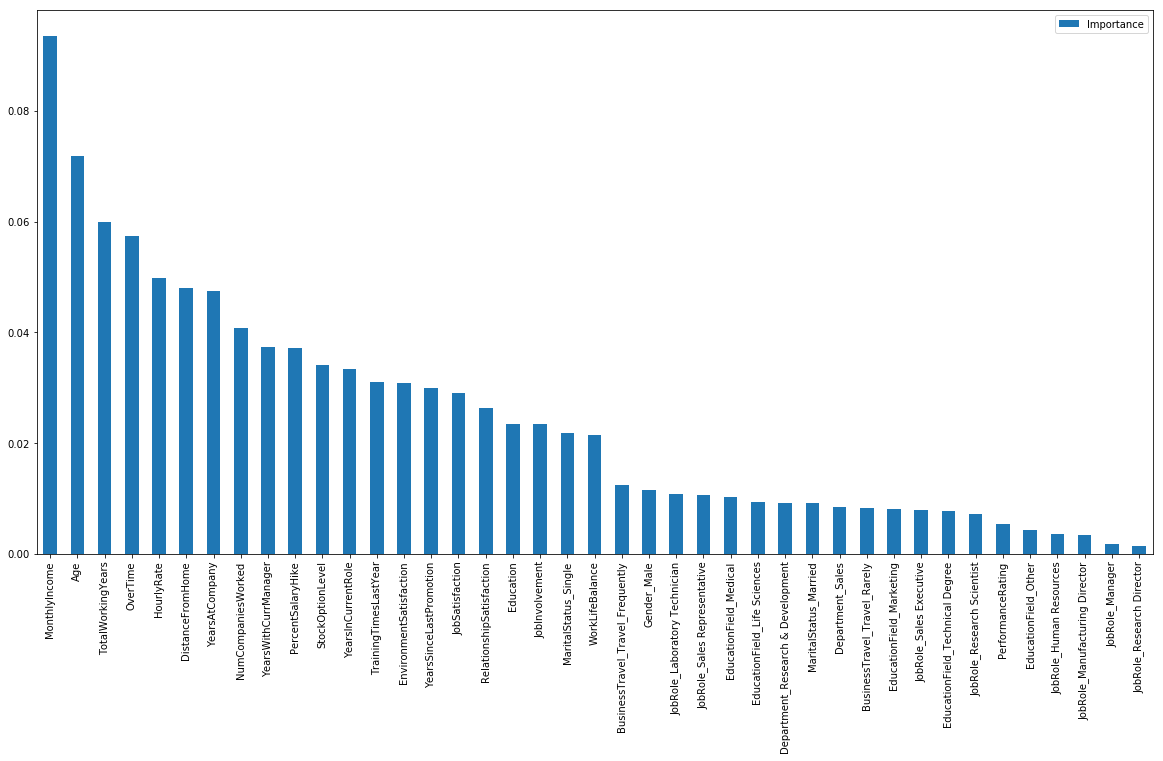

In [95]:
importance = pd.DataFrame(data= rfc.feature_importances_, index=df_index.columns, columns=['Importance'])
abs(importance).sort_values('Importance',ascending=False).plot.bar(figsize=(20,10))

**Using SMOTE**

In [96]:
md_rfc_os = RandomForestClassifier(n_estimators=200)
md_rfc_os.fit(Xos_train, yos_train)

RandomForestClassifier(n_estimators=200)

In [97]:
# Predicting the Test Data and Evaluation
y_pred_os = md_rfc_os.predict(Xos_test)

In [98]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred_os, yos_test)))

Accuracy 93.51701782820098 %


In [99]:
confusion_matrix(y_true=yos_test, y_pred=y_pred_os)

array([[304,   7],
       [ 33, 273]], dtype=int64)

In [100]:
print(classification_report(yos_test,y_pred_os))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       311
           1       0.97      0.89      0.93       306

    accuracy                           0.94       617
   macro avg       0.94      0.93      0.94       617
weighted avg       0.94      0.94      0.94       617



In [101]:
md_rfc_os.feature_importances_

array([0.04455274, 0.03310154, 0.04016491, 0.0472771 , 0.03019673,
       0.03825443, 0.05506109, 0.05256359, 0.03699954, 0.0959273 ,
       0.02546981, 0.0050551 , 0.02438746, 0.0689565 , 0.05062482,
       0.0326104 , 0.03019638, 0.03827999, 0.04040691, 0.02678153,
       0.04169533, 0.00908003, 0.00631777, 0.00503214, 0.00645557,
       0.00692726, 0.00523204, 0.00821662, 0.00277575, 0.0055447 ,
       0.01040117, 0.00180381, 0.0101573 , 0.00296096, 0.00647797,
       0.00272209, 0.00612493, 0.00681677, 0.00397322, 0.01028444,
       0.02413225])

<IPython.core.display.Javascript object>

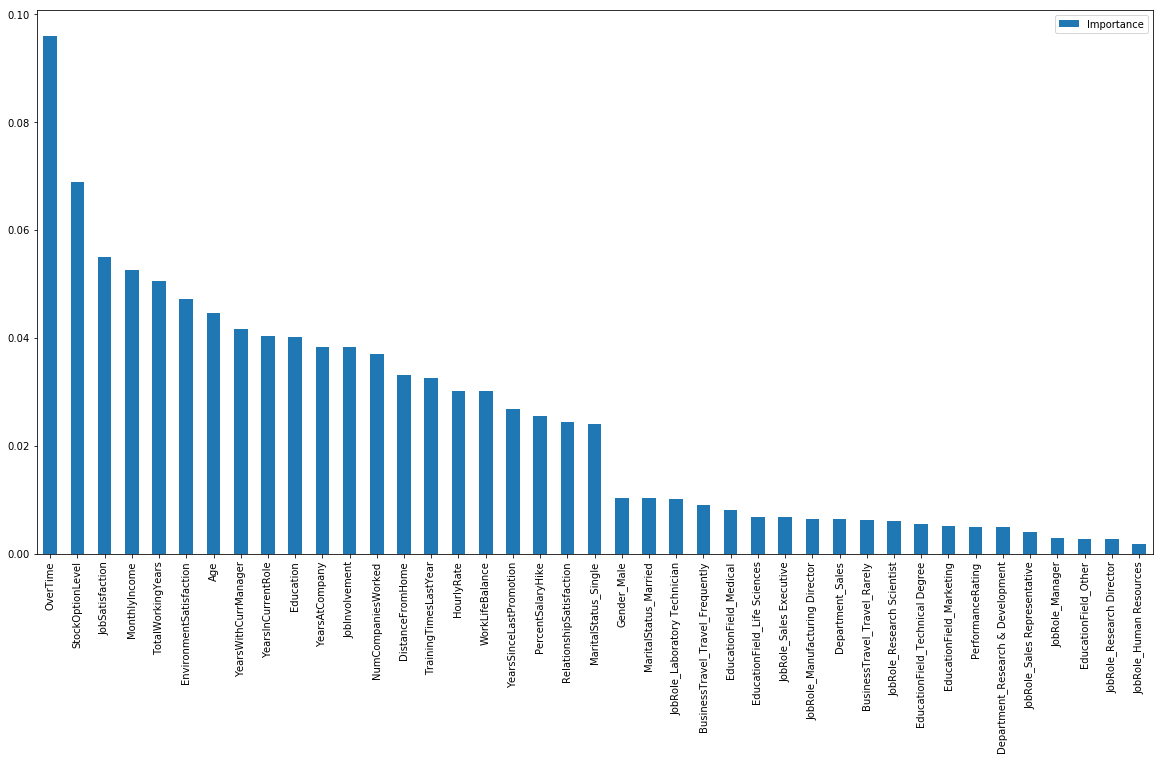

In [102]:
importance = pd.DataFrame(data= md_rfc_os.feature_importances_, index=df_index.columns, columns=['Importance'])
abs(importance).sort_values('Importance',ascending=False).plot.bar(figsize=(20,10))

## TRAIN AND EVALUATE A DEEP LEARNING MODEL 

In [103]:
import tensorflow as tf

In [104]:
md_dl = tf.keras.models.Sequential()
md_dl.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(41, )))
md_dl.add(tf.keras.layers.Dense(units=500, activation='relu'))
md_dl.add(tf.keras.layers.Dense(units=500, activation='relu'))
md_dl.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [105]:
md_dl.summary()
# shows different layers

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               21000     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 522,501
Trainable params: 522,501
Non-trainable params: 0
_________________________________________________________________


In [106]:
md_dl.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [107]:
# We have an unbalanced dataset so we can increase the number of samples for empolyees who left the Co.
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
epochs_hist = md_dl.fit(X_train, y_train, epochs = 100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 1s 7ms/step - loss: 0.4738 - accuracy: 0.8051
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3323 - accuracy: 0.8739
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3214 - accuracy: 0.8831
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3192 - accuracy: 0.8644
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2878 - accuracy: 0.8858
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2745 - accuracy: 0.8883
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1785 - accuracy: 0.9360
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1920 - accuracy: 0.9277
Epoch 9/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1657 - accuracy: 0.9409
Epoch 10/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1497 - accuracy: 0.9426
Epoch 11/

In [108]:
y_pred = md_dl.predict(X_test)
y_pred_a = (y_pred > 0.5) 

In [110]:
y_pred[0:5]

array([[1.3760119e-05],
       [4.7233999e-14],
       [2.1561734e-08],
       [1.6756268e-12],
       [8.7663293e-10]], dtype=float32)

In [111]:
y_pred_a[0:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

In [112]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

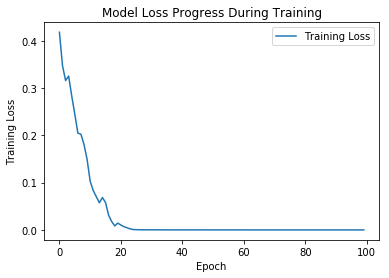

In [113]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

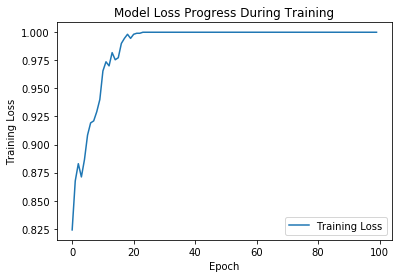

In [114]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [115]:
confusion_matrix(y_true=y_test, y_pred=y_pred_a)

array([[303,  17],
       [ 29,  19]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(5, 0)

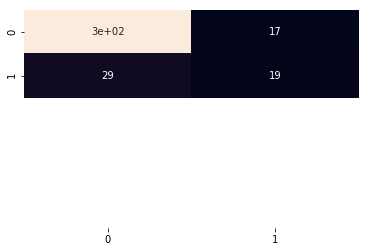

In [116]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred_a), annot=True, cbar=False )
plt.ylim(5,0)

In [117]:
print(classification_report(y_test, y_pred_a))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       320
           1       0.53      0.40      0.45        48

    accuracy                           0.88       368
   macro avg       0.72      0.67      0.69       368
weighted avg       0.86      0.88      0.87       368



**Using SMOTE**

In [118]:
md_dl_os = tf.keras.models.Sequential()
md_dl_os.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(41, )))
md_dl_os.add(tf.keras.layers.Dense(units=500, activation='relu'))
md_dl_os.add(tf.keras.layers.Dense(units=500, activation='relu'))
md_dl_os.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [119]:
md_dl_os.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])
epochs_hist = md_dl_os.fit(Xos_train, yos_train, epochs = 100, batch_size=50)

Epoch 1/100
37/37 [==============================] - 1s 6ms/step - loss: 0.6117 - accuracy: 0.6315
Epoch 2/100
37/37 [==============================] - 0s 6ms/step - loss: 0.4121 - accuracy: 0.8134
Epoch 3/100
37/37 [==============================] - 0s 8ms/step - loss: 0.3231 - accuracy: 0.8665
Epoch 4/100
37/37 [==============================] - 0s 7ms/step - loss: 0.2567 - accuracy: 0.8997
Epoch 5/100
37/37 [==============================] - 0s 7ms/step - loss: 0.1375 - accuracy: 0.9505
Epoch 6/100
37/37 [==============================] - 0s 7ms/step - loss: 0.1170 - accuracy: 0.9614
Epoch 7/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0921 - accuracy: 0.9747
Epoch 8/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0770 - accuracy: 0.9771
Epoch 9/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0427 - accuracy: 0.9863
Epoch 10/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0119 - accuracy: 0.9988
Epoch 11/

In [120]:
y_pred = md_dl_os.predict(Xos_test)
y_pred_a = (y_pred > 0.5) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

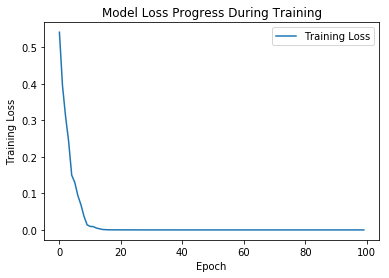

In [121]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

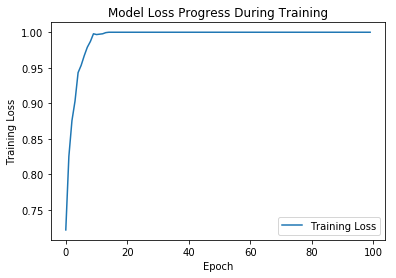

In [122]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [123]:
confusion_matrix(y_true=yos_test, y_pred=y_pred_a)

array([[280,  31],
       [  5, 301]], dtype=int64)

In [124]:
print(classification_report(yos_test, y_pred_a))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       311
           1       0.91      0.98      0.94       306

    accuracy                           0.94       617
   macro avg       0.94      0.94      0.94       617
weighted avg       0.94      0.94      0.94       617



## TRAIN AND EVALUATE A XGB MODEL 

In [125]:
from xgboost import XGBClassifier

In [126]:
XGBc = XGBClassifier()
XGBc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
XGB_pred = XGBc.predict(X_test)

In [128]:
print(confusion_matrix(y_true=y_test, y_pred=XGB_pred))

[[313   7]
 [ 34  14]]


In [129]:
print(classification_report(y_test, XGB_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       320
           1       0.67      0.29      0.41        48

    accuracy                           0.89       368
   macro avg       0.78      0.63      0.67       368
weighted avg       0.87      0.89      0.87       368



In [130]:
XGBc.feature_importances_

array([0.02115235, 0.01930645, 0.02002809, 0.02589028, 0.01681869,
       0.02389413, 0.02096378, 0.03212735, 0.02781391, 0.05494069,
       0.01252447, 0.        , 0.0192277 , 0.0464735 , 0.03463629,
       0.01717274, 0.02286709, 0.02702321, 0.02457965, 0.02556697,
       0.01647914, 0.02973347, 0.01309747, 0.01209476, 0.0560981 ,
       0.01975161, 0.11893908, 0.01692741, 0.01044221, 0.01812893,
       0.01548003, 0.00088006, 0.01564146, 0.        , 0.01635835,
       0.        , 0.04117052, 0.03511221, 0.01511159, 0.01884119,
       0.03670505], dtype=float32)

<IPython.core.display.Javascript object>

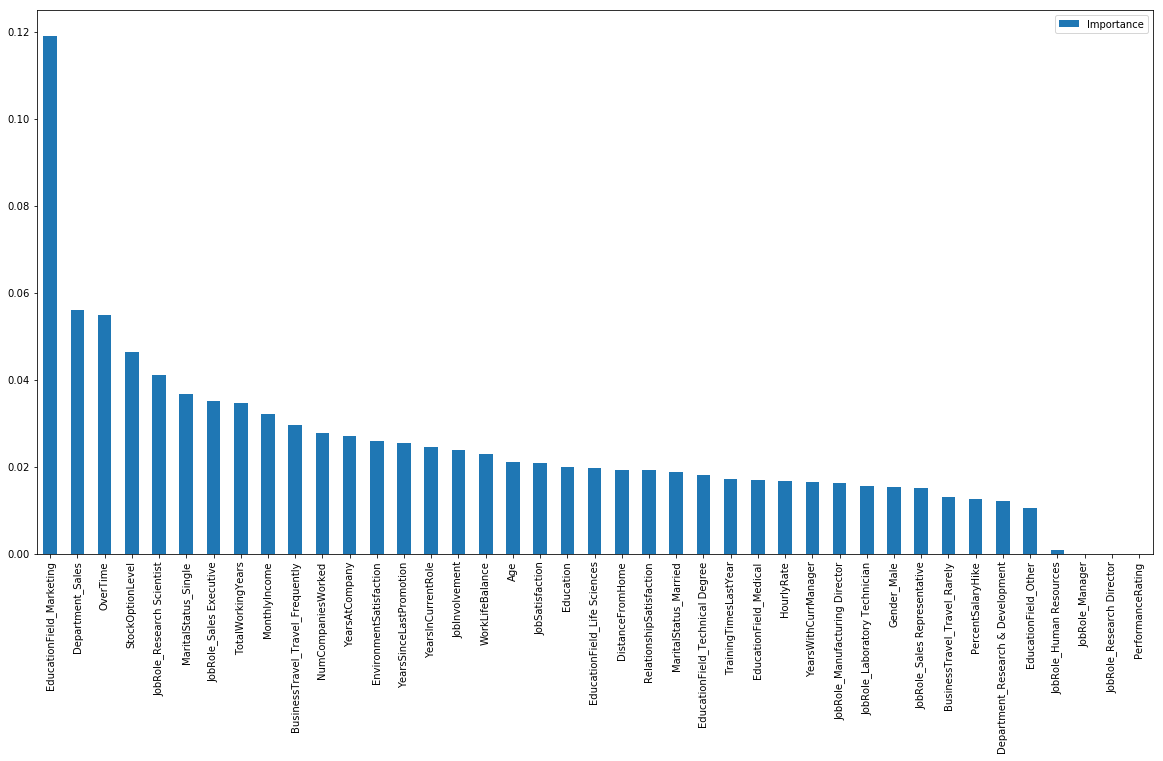

In [131]:
importance = pd.DataFrame(data= XGBc.feature_importances_, index=df_index.columns, columns=['Importance'])
abs(importance).sort_values('Importance',ascending=False).plot.bar(figsize=(20,10))

**Using SMOTE**

In [132]:
md_XGB_os = XGBClassifier()
md_XGB_os.fit(Xos_train, yos_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
XGB_pred_os = md_XGB_os.predict(Xos_test)

In [135]:
print(confusion_matrix(y_true=yos_test, y_pred=XGB_pred_os))

[[300  11]
 [ 32 274]]


In [136]:
print(classification_report(yos_test, XGB_pred_os))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       311
           1       0.96      0.90      0.93       306

    accuracy                           0.93       617
   macro avg       0.93      0.93      0.93       617
weighted avg       0.93      0.93      0.93       617



**Feature Importance**

In [137]:
md_XGB_os.feature_importances_

array([0.01805854, 0.01395485, 0.01745432, 0.02048645, 0.00621245,
       0.03523465, 0.02806647, 0.02736743, 0.0272332 , 0.14307006,
       0.00757684, 0.00786828, 0.01871871, 0.08485301, 0.00999298,
       0.01966373, 0.0344332 , 0.01190152, 0.0134333 , 0.01237389,
       0.02674468, 0.02027803, 0.01098468, 0.00825179, 0.00778497,
       0.01073523, 0.02812058, 0.00955254, 0.00907779, 0.01324018,
       0.01434552, 0.0123717 , 0.02756541, 0.        , 0.03640966,
       0.        , 0.03586182, 0.12060574, 0.02364681, 0.01061214,
       0.01585686], dtype=float32)

<IPython.core.display.Javascript object>

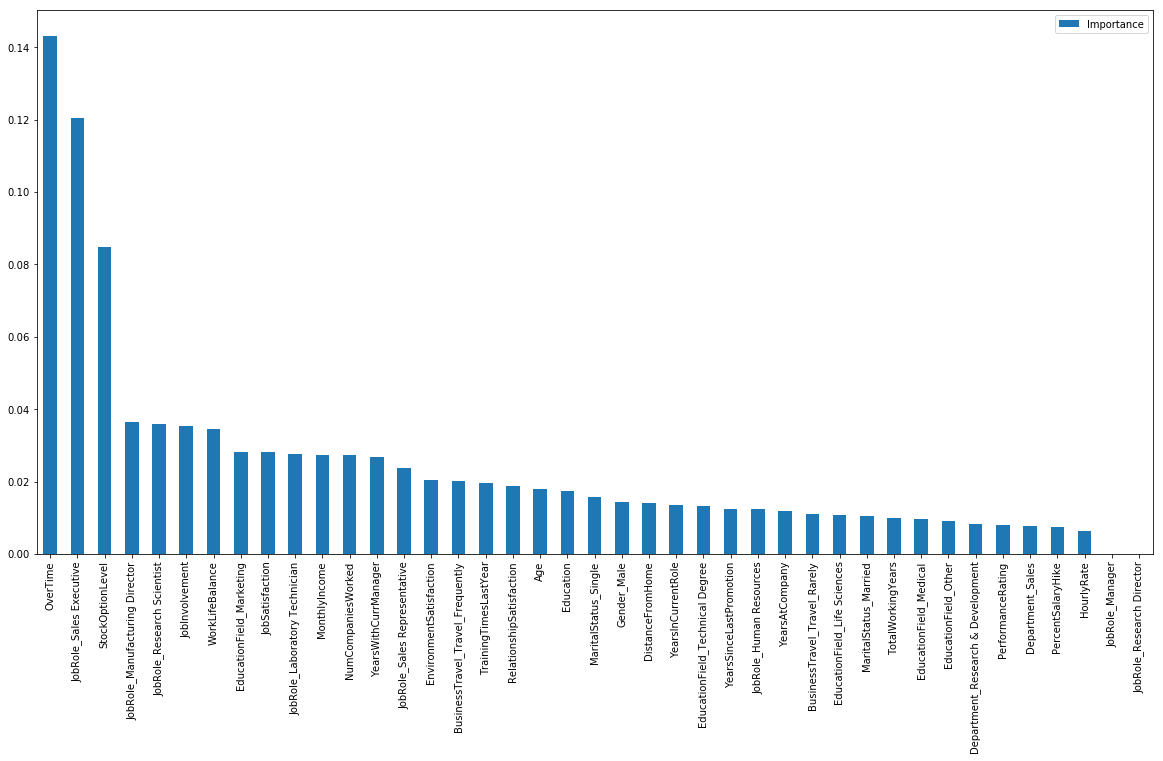

In [138]:
importance = pd.DataFrame(data= md_XGB_os.feature_importances_, index=df_index.columns, columns=['Importance'])
abs(importance).sort_values('Importance',ascending=False).plot.bar(figsize=(20,10))

***Lets create a new df with only the selected features***

In [140]:
remove=['YearsAtCompany', 'DailyRate','PercentSalaryHike', 'Gender', 'HourlyRate', 'PerformanceRating', 'TrainingTimesLastYear',
       'EmployeeCount','StandardHours','Over18','EmployeeNumber', 'MonthlyRate', 'JobLevel']
remove

['YearsAtCompany',
 'DailyRate',
 'PercentSalaryHike',
 'Gender',
 'HourlyRate',
 'PerformanceRating',
 'TrainingTimesLastYear',
 'EmployeeCount',
 'StandardHours',
 'Over18',
 'EmployeeNumber',
 'MonthlyRate',
 'JobLevel']

In [141]:
data_original = pd.read_csv('Human_Resources.csv')

<IPython.core.display.Javascript object>

In [235]:
# features = []
# for col in original.columns:
#     features.append(col)


In [143]:
data_original.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [144]:
features = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [145]:
selected_features = [item for item in features if item not in remove]

In [146]:
print('Total features: {}'.format(len(features)))
print('Features to remove: {}'.format(len(remove)))
print('Selected features: {}'.format(len(selected_features)))

Total features: 35
Features to remove: 13
Selected features: 22


In [147]:
# save selected features
pd.Series(selected_features).to_csv('selected_features.csv', index=False)

<IPython.core.display.Javascript object>

In [150]:
# Create dataset with important features only
new_df = data_original[selected_features]
new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,...,MonthlyIncome,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,3,Sales Executive,...,5993,8,Yes,1,0,8,1,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,2,Research Scientist,...,5130,1,No,4,1,10,3,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,2,Laboratory Technician,...,2090,6,Yes,2,0,7,3,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,3,Research Scientist,...,2909,1,Yes,3,0,8,3,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,3,Laboratory Technician,...,3468,9,No,4,1,6,3,2,2,2


In [149]:
# Updated csv with important features only
new_df.to_csv('new_HR.csv', index=False)

In [152]:
a = pd.read_csv('new_HR.csv')
a.head()

<IPython.core.display.Javascript object>

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,...,MonthlyIncome,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,3,Sales Executive,...,5993,8,Yes,1,0,8,1,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,2,Research Scientist,...,5130,1,No,4,1,10,3,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,2,Laboratory Technician,...,2090,6,Yes,2,0,7,3,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,3,Research Scientist,...,2909,1,Yes,3,0,8,3,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,3,Laboratory Technician,...,3468,9,No,4,1,6,3,2,2,2
